# Pre-processamento dos dados do arquivo daily-minimum-temperatures.csv

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

### Conhecendo os dados

Primeiro conheçemos os dados originais, 10 anos completos 1981 até 1990 

       Daily minimum temperatures
count                 3650.000000
mean                    11.177753
std                      4.071837
min                      0.000000
25%                      8.300000
50%                     11.000000
75%                     14.000000
max                     26.300000


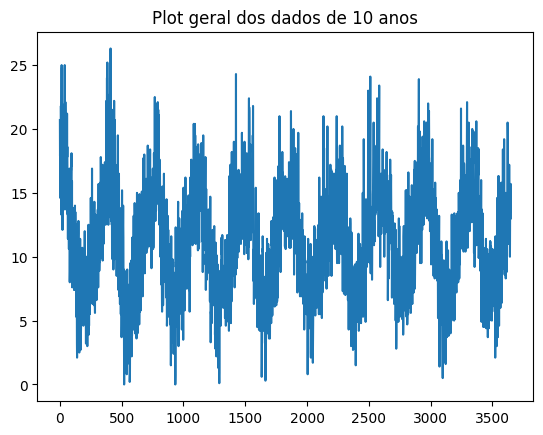

In [33]:
dados = pd.read_csv('daily-minimum-temperatures.csv')
print(dados.describe())
T = dados['Daily minimum temperatures'].values
plt.plot(T)
plt.title("Plot geral dos dados de 10 anos")
plt.show()
dados['Date'] = pd.to_datetime(dados['Date'], format='%m/%d/%Y')
dados['Year'] = dados['Date'].dt.year.astype(int)


Depois conheçemos os dados (plots) ano a ano

Adequação de tipo, criação de novas colunas \
Criação de novas colunas 1981, 1982... 1990

In [34]:
for i in range(1981, 1991):
    new_column = str(i)
    dados[new_column] = dados.apply(lambda row: row['Date'].strftime('%m-%d') if row['Year'] == i else None, axis=1)
for i in range(1981,1991):
    j = str(i)
    dados[j] = dados[j].replace({None: np.nan})
    dados[j] = dados[j].replace({np.nan: '0'})
    y = dados['1981']
    '''Uncomment for plot'''
    # print(y)
    # plt.plot(y,T)
    # plt.show()

### Edição do dataset, distorcendo alguns dados

Adicionando ruido gaussiano

In [35]:

probabilidade_ruido = 0.1
probabilidade_delete = 0.01
dados_temp = dados['Daily minimum temperatures'].copy()

# Adicione valores nulos e ruido aleatoriamente
for i in range(1981,1991):
    j = str(i)
    for index in range(len(dados_temp)):
        if random.random() < probabilidade_ruido:
            dados_temp[index] += np.random.normal(scale= 1)
        if random.random() < probabilidade_delete:
            dados_temp[index] = np.nan 
        # if random.random() < probabilidade_ruido:
        #     dados.at[index, j] += np.random.normal(scale= 30)
# dados_Campo.to_csv('dados.csv',index= False)
dados['Daily minimum temperatures'] = dados_temp
T = dados_temp

# for i in range(1981,1991):
#     j = str(i)
#     y = dados[j].values
#     # plt.plot(y,T)
#     # plt.show()
print(dados.describe())
dados.to_csv('dados_ruido.csv', index = False)


                      Date  Daily minimum temperatures         Year
count                 3650                 3283.000000  3650.000000
mean   1985-12-31 07:12:00                   11.177949  1985.500000
min    1981-01-01 00:00:00                   -0.701119  1981.000000
25%    1983-07-02 06:00:00                    8.235310  1983.000000
50%    1985-12-31 12:00:00                   11.100000  1985.500000
75%    1988-06-30 18:00:00                   14.039103  1988.000000
max    1990-12-31 00:00:00                   27.218039  1990.000000
std                    NaN                    4.212119     2.872675
